# Brexit: Predicting the referendum result with sociodemographic data

In [1]:
brexit_polls <- read.csv("https://assets.datacamp.com/production/repositories/1934/datasets/7ccf1326fcff4d5c17ca63b39329b17c264cce23/brexit_polls.csv",
                        header = TRUE, sep = ",")
head(brexit_polls)

brexit_se <- read.csv("https://assets.datacamp.com/production/repositories/1934/datasets/7c5ad33c949eb0042d50f8c18d538cde0c7bf4e7/brexit_results.csv",
                         header = TRUE, sep = ",")
head(brexit_se)

,Date,Remain,Leave
,<fct>,<int>,<int>
1,6/23/16,52,48
2,6/22/16,55,45
3,6/22/16,51,49
4,6/22/16,49,46
5,6/22/16,44,45
6,6/22/16,54,46


,Seat,con_2015,lab_2015,ld_2015,ukip_2015,leave_share,born_in_uk,male,unemployed,degree,age_18to24
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aldershot,50.592,18.333,8.824,17.867,57.89777,83.10464,49.89896,3.637000,13.870661,9.406093
2,Aldridge-Brownhills,52.050,22.369,3.367,19.624,67.79635,96.12207,48.92951,4.553607,9.974114,7.325850
3,Altrincham and Sale West,52.994,26.686,8.383,8.011,38.58780,90.48566,48.90621,3.039963,28.600135,6.437453
4,Amber Valley,43.979,34.781,2.975,15.887,65.29912,97.30437,49.21657,4.261173,9.336294,7.747801
5,Arundel and South Downs,60.788,11.197,7.192,14.438,49.70111,93.33793,48.00189,2.468100,18.775591,5.734730
6,Ashfield,22.418,41.022,14.828,21.409,70.47289,96.96214,49.17185,4.742731,6.085457,8.209863


[1] 2.857143

`geom_smooth()` using formula 'y ~ x'



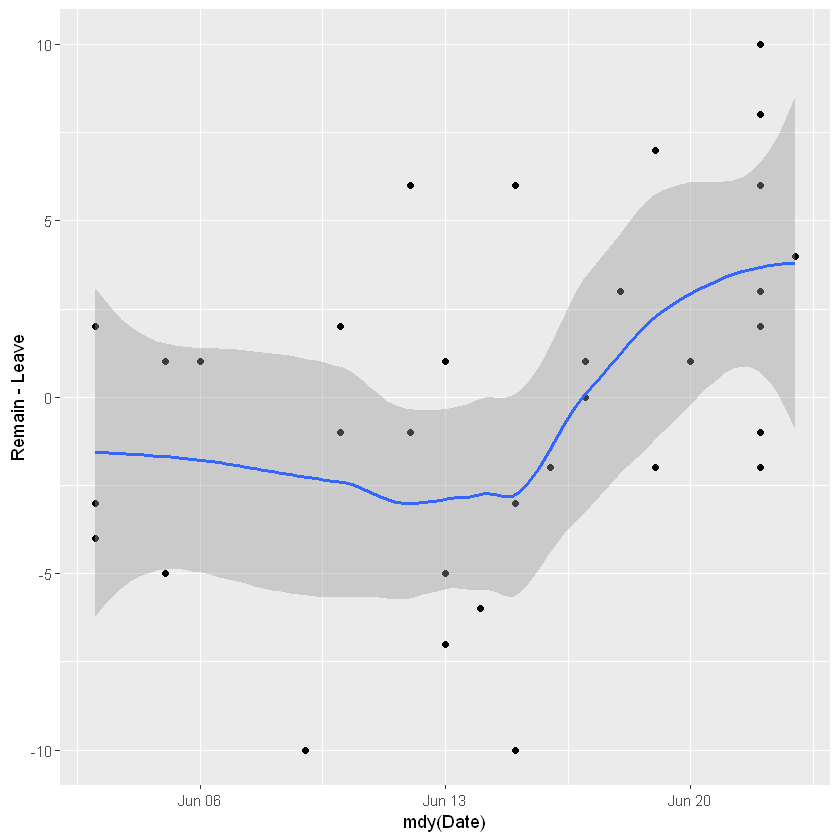

In [7]:
library(dplyr)
library(tidyr)
library(lubridate)
library(ggplot2)

# Filtering the dataset to polls only released after June 16th, 2016, and mutate a variable for the Remain campaign's lead
brexit_average <- brexit_polls %>%
  filter(mdy(Date)>ymd("2016-06-16") )%>%
  mutate(RemainLead = Remain - Leave)  

# Average of the last seven days of polling
mean(brexit_average$RemainLead)

# Summarising the Remain lead from the entire month of the referendum 
ggplot(brexit_polls, aes(x=mdy(Date), y= Remain - Leave)) +
  geom_point() + 
  geom_smooth(method='loess')

,Seat,con_2015,lab_2015,ld_2015,ukip_2015,leave_share,born_in_uk,male,unemployed,degree,age_18to24
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aldershot,50.592,18.333,8.824,17.867,57.89777,83.10464,49.89896,3.637000,13.870661,9.406093
2,Aldridge-Brownhills,52.050,22.369,3.367,19.624,67.79635,96.12207,48.92951,4.553607,9.974114,7.325850
3,Altrincham and Sale West,52.994,26.686,8.383,8.011,38.58780,90.48566,48.90621,3.039963,28.600135,6.437453
4,Amber Valley,43.979,34.781,2.975,15.887,65.29912,97.30437,49.21657,4.261173,9.336294,7.747801
5,Arundel and South Downs,60.788,11.197,7.192,14.438,49.70111,93.33793,48.00189,2.468100,18.775591,5.734730
6,Ashfield,22.418,41.022,14.828,21.409,70.47289,96.96214,49.17185,4.742731,6.085457,8.209863


`geom_smooth()` using formula 'y ~ x'



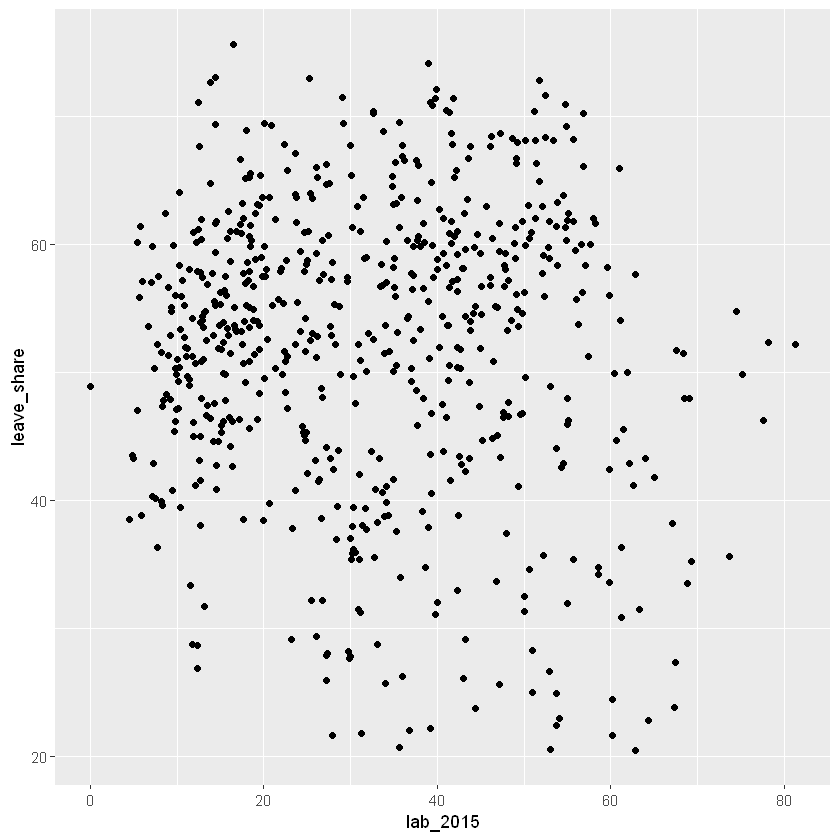

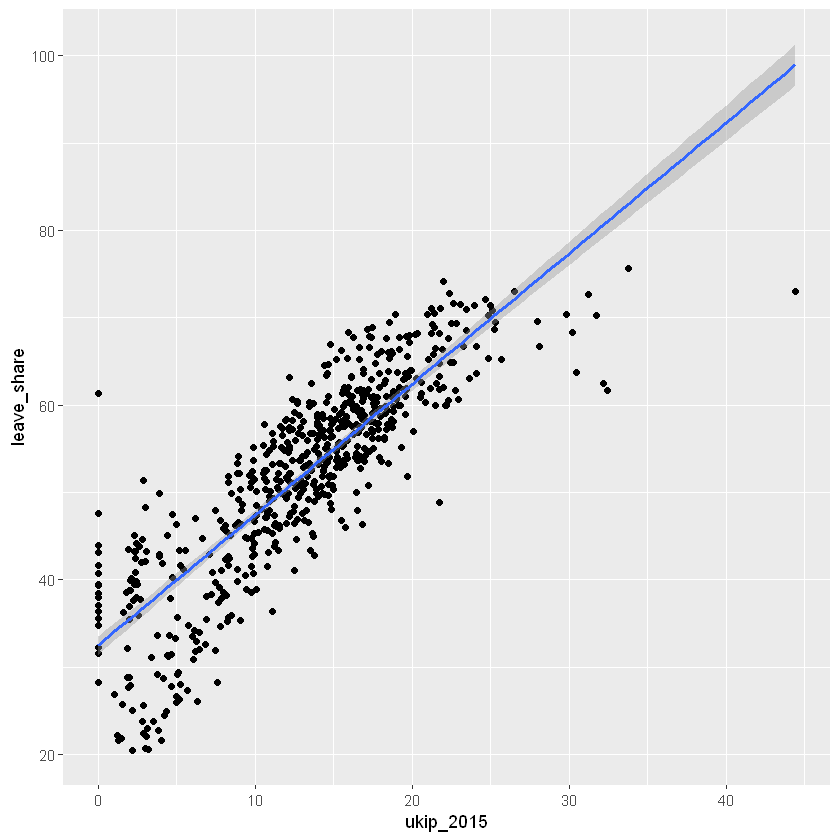

In [6]:
head(brexit_se)

# Charting the counstituency-by-constituency relationship between voting for the Labour Party and voting to leave the EU
ggplot(brexit_se,aes(x=lab_2015,y=leave_share)) + 
  geom_point()

# Showing the relationship between UKIP and Leave vote share with points and a line representing the linear relationship between the variables
ggplot(brexit_se,aes(x=ukip_2015,y=leave_share)) + 
  geom_point()  +
  geom_smooth(method = "lm")